In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


# Replace 'file_path' with the path to your TSV file
file_path = 'SMSSpamCollection.tsv'

# Load the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t', names=["label", "message"])


# Display the DataFrame
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
import re
import nltk

import ssl
import nltk
import urllib.request

# Bypass SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# Download NLTK stopwords data
nltk.download('stopwords', download_dir='.')

# Add NLTK data directory to NLTK's data path
nltk.data.path.append('.')


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to ....
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bheema.ujwala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
lemmatizer = WordNetLemmatizer()

In [20]:
messages = pd.read_csv(file_path, sep='\t', names = ["label", "message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [22]:
corpus = []

for i in range(len(messages)):
    text = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X=cv.fit_transform(corpus).toarray()
y = messages['label']

In [27]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X.shape

(5572, 7098)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

train_pred = nb_classifier.predict(X_train)
test_pred = nb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9925959165357864
Testing Accuracy: 0.9739910313901345


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(corpus).toarray()

y = messages['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

train_pred = nb_classifier.predict(X_train)
test_pred = nb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9838456360780794
Testing Accuracy: 0.9820627802690582


In [54]:
tfidf = TfidfVectorizer(max_features=2700)
X = tfidf.fit_transform(corpus).toarray()

y = messages['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

train_pred = nb_classifier.predict(X_train)
test_pred = nb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9840700022436617
Testing Accuracy: 0.9811659192825112


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

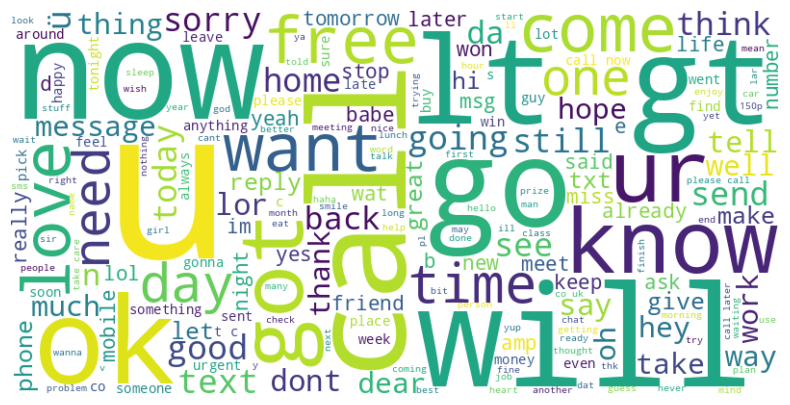

In [57]:
text = ' '.join(messages['message'])  # Replace 'text_column' with the name of the column containing text data

# Preprocess the text data if necessary (e.g., convert to lowercase)
text = text.lower()

# Generate word frequencies from the text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Create the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

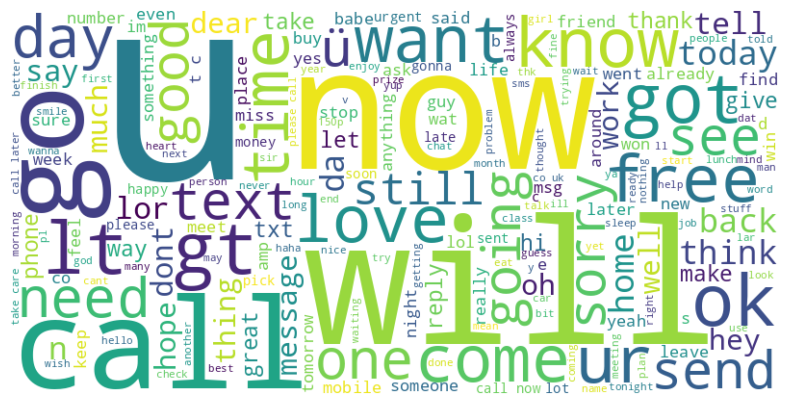

In [58]:
text = ' '.join(df['message'])  # Replace 'text_column' with the name of the column containing text data

# Preprocess the text data if necessary (e.g., convert to lowercase)
text = text.lower()

# Generate word frequencies from the text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Create the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
file_path = 'NLP_casestudy.csv'

# Load the TSV file into a DataFrame
df = pd.read_csv(file_path)


# Display the DataFrame
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",Hammers hand Robson a youthful lesson,Saints party like it's 1999,Wear wolves have turned into lambs,Stump mike catches testy Gough's taunt,Langer escapes to hit 167,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,A tale of two tails,I say what I like and I like what I say,"Elbows, Eyes and Nipples",Task force to assess risk of asteroid collision,How I found myself at last,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,Pele turns up heat on Ferguson,Party divided over Kohl slush fund scandal,Manchester United (England),Women in record South Pole walk,Vasco da Gama (Brazil),South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,"Our choice, not theirs",Profile of former US Nazi Party officer Willia...,New evidence shows record of war crimes suspec...,The rise of the supernerds,Written on the body,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",Met faces fresh attack on race crime,Everton fans top racist 'league of shame',"Our breasts, ourselves",Russia's new boss has an extremely strange his...,Always and forever,Most everywhere: UDIs,Most wanted: Chloe lunettes,

In [10]:
df.dtypes

Date     object
Label     int64
Top1     object
Top2     object
Top3     object
Top4     object
Top5     object
Top6     object
Top7     object
Top8     object
Top9     object
Top10    object
Top11    object
Top12    object
Top13    object
Top14    object
Top15    object
Top16    object
Top17    object
Top18    object
Top19    object
Top20    object
Top21    object
Top22    object
Top23    object
Top24    object
Top25    object
dtype: object

In [11]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [13]:

concatenated_text = df.iloc[:, 2:].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Create a new DataFrame with date, concatenated text, and label
new_df = pd.DataFrame({'Text': concatenated_text, 'Label': df['Label']})
new_df.head()

,Text,Label
0,A 'hindrance to operations': extracts from the...,0
1,Scorecard The best lake scene Leader: German s...,0
2,Coventry caught on counter by Flo United's riv...,0
3,Pilgrim knows how to progress Thatcher facing ...,1
4,Hitches and Horlocks Beckham off but United su...,1


In [14]:
new_df['Text'][0]

"A 'hindrance to operations': extracts from the leaked reports Scorecard Hughes' instant hit buoys Blues Jack gets his skates on at ice-cold Alex Chaos as Maracana builds up for United Depleted Leicester prevail as Elliott spoils Everton's party Hungry Spurs sense rich pickings Gunners so wide of an easy target Derby raise a glass to Strupar's debut double Southgate strikes, Leeds pay the penalty Hammers hand Robson a youthful lesson Saints party like it's 1999 Wear wolves have turned into lambs Stump mike catches testy Gough's taunt Langer escapes to hit 167 Flintoff injury piles on woe for England Hunters threaten Jospin with new battle of the Somme Kohl's successor drawn into scandal The difference between men and women Sara Denver, nurse turned solicitor Diana's landmine crusade put Tories in a panic Yeltsin's resignation caught opposition flat-footed Russian roulette Sold out Recovering a title"

In [67]:
new_df.iloc[:, 1:]

,Label
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [ ]:
# new_df = pd.DataFrame({'Date': dates, 'Text': texts})

In [16]:
# corpus = []

# for i in range(len(new_df)):
#     text = re.sub('[^a-zA-Z]', ' ', new_df['Text'][i])
#     text = text.lower()
#     text = text.split()
#     text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
#     text = ' '.join(text)
#     corpus.append(text)
    
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

corpus = []

for text in new_df['Text']:
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Tokenize the text
    words = text.split()
    # Lemmatize and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the words back into a string
    processed_text = ' '.join(words)
    corpus.append(processed_text)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(corpus).toarray()
y = new_df['Label']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(corpus).toarray()

y = new_df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

train_pred = nb_classifier.predict(X_train)
test_pred = nb_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7310975609756097
Testing Accuracy: 0.5408038976857491


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Preprocessing
corpus = new_df['Text'].tolist()
labels = new_df['Label'].tolist()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Padding sequences
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

embedding_dim = 64
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=5)

_, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("batch_size=64, epochs=5")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - accuracy: 0.5222 - loss: 0.6951 - val_accuracy: 0.5018 - val_loss: 0.6947
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.5084 - loss: 0.6947 - val_accuracy: 0.5250 - val_loss: 0.6942
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.4760 - loss: 0.6989 - val_accuracy: 0.5225 - val_loss: 0.6937
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.4985 - loss: 0.6965 - val_accuracy: 0.5469 - val_loss: 0.6904
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.5119 - loss: 0.6933 - val_accuracy: 0.5603 - val_loss: 0.6866
Training Accuracy: 0.5146341323852539
Test Accuracy: 0.5602923035621643


In [22]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=200, epochs=20)

# Evaluate the model
_, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
ptint("batch_size=200, epochs=20")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.5112 - loss: 0.6948 - val_accuracy: 0.4531 - val_loss: 0.6937
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.4963 - loss: 0.6933 - val_accuracy: 0.5189 - val_loss: 0.6863
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.5249 - loss: 0.6927 - val_accuracy: 0.5469 - val_loss: 0.6912
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 338ms/step - accuracy: 0.5178 - loss: 0.6939 - val_accuracy: 0.5469 - val_loss: 0.6912
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.5042 - loss: 0.6944 - val_accuracy: 0.5396 - val_loss: 0.6895
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.5255 - loss: 0.6915 - val_accuracy: 0.5469 - val_loss: 0.6916
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 343ms/step - accuracy: 0.5120 - loss: 0.6933 - val_accuracy: 0.5542 - val_loss: 0.6922
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.5271 - loss: 0.6923 - val_accuracy: 0.

In [25]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=200, epochs=50)

# Evaluate the model
_, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("batch_size=200, epochs=50")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 479ms/step - accuracy: 0.5095 - loss: 0.6957 - val_accuracy: 0.5469 - val_loss: 0.6916
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 403ms/step - accuracy: 0.5207 - loss: 0.6938 - val_accuracy: 0.4580 - val_loss: 0.6962
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.5078 - loss: 0.6936 - val_accuracy: 0.4543 - val_loss: 0.6964
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.5276 - loss: 0.6911 - val_accuracy: 0.5493 - val_loss: 0.6913
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.4934 - loss: 0.6970 - val_accuracy: 0.5469 - val_loss: 0.6903
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 348ms/step - accuracy: 0.5295 - loss: 0.6920 - val_accuracy: 0.5469 - val_loss: 0.6920
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - accuracy: 0.5302 - loss: 0.6918 - val_accuracy: 0.5469 - val_loss: 0.6922
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.5147 - loss: 0.6933 - val_accuracy: 0

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Preprocessing
corpus = new_df['Text'].tolist()
labels = new_df['Label'].tolist()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Padding sequences
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Convert labels to numpy array
labels = np.array(labels)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define LSTM model
embedding_dim = 64
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

# Evaluate the model
_, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("batch_size=64, epochs=20")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.5355 - loss: 0.6919 - val_accuracy: 0.5469 - val_loss: 0.6921
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 348ms/step - accuracy: 0.5263 - loss: 0.6920 - val_accuracy: 0.5469 - val_loss: 0.6910
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 334ms/step - accuracy: 0.5263 - loss: 0.6923 - val_accuracy: 0.5469 - val_loss: 0.6896
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 353ms/step - accuracy: 0.5248 - loss: 0.6921 - val_accuracy: 0.5469 - val_loss: 0.6902
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - accuracy: 0.5231 - loss: 0.6922 - val_accuracy: 0.5469 - val_loss: 0.6906
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step - accuracy: 0.5399 - loss: 0.6911 - val_accuracy: 0.5469 - val_loss: 0.6906
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 361ms/step - accuracy: 0.5225 - loss: 0.6924 - val_accuracy: 0.5469 - val_loss: 0.6899
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 327ms/step - accuracy: 0.5274 - loss: 0.6918 - val_accu

In [28]:
X = tfidf.fit_transform(corpus).toarray()
y = new_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3280, 821, 3280, 821)

In [29]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [31]:
# Preprocessing
corpus = new_df['Text'].tolist()
labels = new_df['Label']

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Convert sequences to numpy array
X = np.array(sequences)
y = np.array(labels)

# TF-IDF transformation
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(new_df['Text']).toarray()

# Train-test split for TF-IDF data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train-test split for tokenized sequences
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train_tfidf, X_test_tfidf, X_train_seq, and X_test_seq for training and testing.

In [34]:
# Define LSTM model
embedding_dim = 64
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=20)

# Evaluate the model
_, train_accuracy = model.evaluate(X_train_tfidf, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_train_seq, y_train_seq, verbose=0)

print("batch_size=64, epochs=20")
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.5108 - loss: 0.6929 - val_accuracy: 0.5469 - val_loss: 0.6922
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.5258 - loss: 0.6927 - val_accuracy: 0.5469 - val_loss: 0.6898
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - accuracy: 0.5275 - loss: 0.6918 - val_accuracy: 0.5469 - val_loss: 0.6905
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.5148 - loss: 0.6928 - val_accuracy: 0.5469 - val_loss: 0.6893
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.5240 - loss: 0.6922 - val_accuracy: 0.5469 - val_loss: 0.6901
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.5224 - loss: 0.6922 - val_accuracy: 0.5469 - val_loss: 0.6902
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - accuracy: 0.5293 - loss: 0.6917 - val_accuracy: 0.5469 - val_loss: 0.6905
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.5108 - loss: 0.6930 - val_accu

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [33]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'